In [1]:
# Memuat Dataset MNIST ke Dalam Data Loader:

import torch
from torchvision import datasets, transforms

# Menentukan transformasi data
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5,), (0.5,))])

# Memuat dataset MNIST
train_dataset = datasets.MNIST(root='./data', train=True, transform=transform, download=True)
test_dataset = datasets.MNIST(root='./data', train=False, transform=transform)

# Membuat data loader
train_loader = torch.utils.data.DataLoader(dataset=train_dataset, batch_size=64, shuffle=True)
test_loader = torch.utils.data.DataLoader(dataset=test_dataset, batch_size=64, shuffle=False)

100%|██████████| 9912422/9912422 [00:00<00:00, 87995392.88it/s]


Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw



100%|██████████| 28881/28881 [00:00<00:00, 57546647.90it/s]


Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw



100%|██████████| 1648877/1648877 [00:00<00:00, 31089644.40it/s]


Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw



100%|██████████| 4542/4542 [00:00<00:00, 13685724.69it/s]

Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw



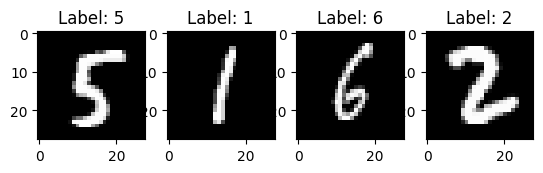

In [3]:
# visualisasi dataset MNIST

import matplotlib.pyplot as plt
import numpy as np

# Ambil satu batch data dari loader pelatihan
data_iter = iter(train_loader)
images, labels = next(data_iter)

# Menampilkan beberapa sampel
num_samples = 4
for i in range(num_samples):
    plt.subplot(1, num_samples, i + 1)
    plt.imshow(images[i].numpy().squeeze(), cmap='gray')
    plt.title(f'Label: {labels[i]}')
plt.show()

In [4]:
# MODEL NEURAL NETWORK SEDERHANA

import torch.nn as nn

class NeuralNet(nn.Module):
    def __init__(self, input_size, hidden_size, num_classes):
        super(NeuralNet, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(hidden_size, num_classes)

    def forward(self, x):
        out = self.fc1(x)
        out = self.relu(out)
        out = self.fc2(out)
        return out

model = NeuralNet(input_size=28*28, hidden_size=128, num_classes=10)

In [5]:
# MEMBUAT HYPERPARAMETER

import torch.optim as optim

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.01)

In [6]:
# LOOP TRAIN DAN TRAINING MODEL

num_epochs = 10

for epoch in range(num_epochs):
    for images, labels in train_loader:
        images = images.view(-1, 28*28)
        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

    print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')

Epoch [1/10], Loss: 0.2892
Epoch [2/10], Loss: 0.1658
Epoch [3/10], Loss: 0.2743
Epoch [4/10], Loss: 0.5024
Epoch [5/10], Loss: 0.1623
Epoch [6/10], Loss: 0.4289
Epoch [7/10], Loss: 0.1768
Epoch [8/10], Loss: 0.5386
Epoch [9/10], Loss: 0.1428
Epoch [10/10], Loss: 0.1472


In [8]:
# EVALUASI MODEL

correct = 0
total = 0
y_true = []
y_pred = []

with torch.no_grad():
    for images, labels in test_loader:
        images = images.view(-1, 28*28)
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()
        y_true.extend(labels.tolist())
        y_pred.extend(predicted.tolist())

accuracy = 100 * correct / total
print(f'Accuracy: {accuracy:.2f}')

# Sekarang Anda dapat menghitung metrik lain dengan menggunakan y_true dan y_pred
from sklearn.metrics import confusion_matrix, f1_score, precision_score, recall_score

cm = confusion_matrix(y_true, y_pred)
f1 = f1_score(y_true, y_pred, average='weighted')
precision = precision_score(y_true, y_pred, average='weighted')
recall = recall_score(y_true, y_pred, average='weighted')

print(f'Confusion Matrix:\n{cm}')
print(f'F1 Score: {f1:.2f}')
print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')

Accuracy: 94.68
Confusion Matrix:
[[ 962    0    0    1    0    3   11    1    1    1]
 [   0 1110    3    2    0    1    4    2   13    0]
 [   7    3  967   12    9    2    8    7   15    2]
 [   0    0   12  960    1    8    2   11   10    6]
 [   1    2    5    0  925    0    9    2    3   35]
 [   9    1    3   27    6  814    9    2   13    8]
 [  10    3    3    0    7    9  922    1    3    0]
 [   1    7   21    6    6    2    0  952    2   31]
 [   4    6    4   17    8    7   11    6  905    6]
 [   9    7    1   11   16    3    1    7    3  951]]
F1 Score: 0.95
Precision: 0.95
Recall: 0.95


**Dari hasil model klasifikasi digit tertulis tangan menggunakan jaringan saraf tiruan (Neural Network) yang sudah dipraktekkan diatas, menunjukkan jaringan saraf tiruan memiliki tingkat keakuratan yang tinggi, yakni sebesar 94.68%. hal ini juga ditinjau dengan nilai F1-Score, Precission, dan nilai Recall nya yang tinggi. yaitu sebesar 95%.**